In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
### read the dataset
df=pd.read_csv('height-weight.csv')
df.head(5)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

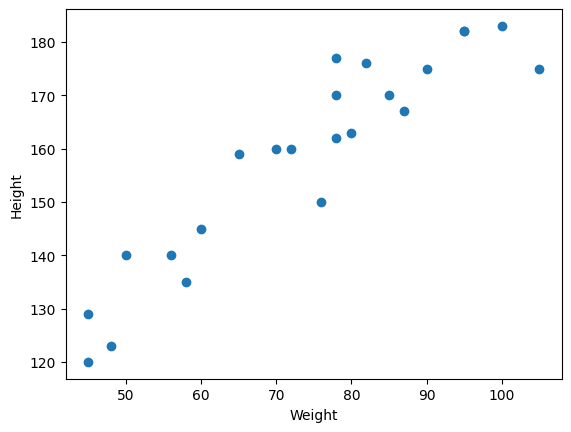

In [18]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [19]:
### divide the dataset into dependent and independent features
x=df[['Weight']] ## independent feature
y=df[['Height']] ## dependent feature

In [20]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [21]:
x.shape,y.shape


((23, 1), (23, 1))

In [22]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((18, 1), (18, 1), (5, 1), (5, 1))

In [23]:
### standardization of the dataset's independent feature
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [25]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

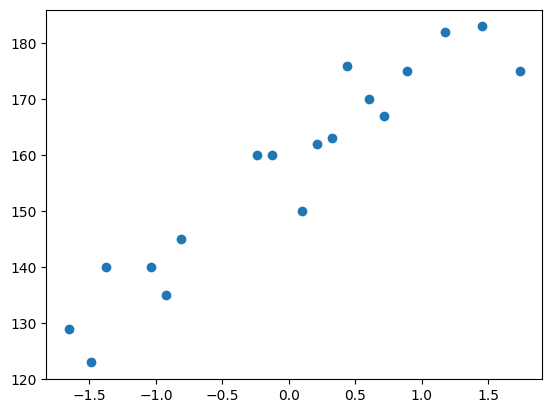

In [26]:
plt.scatter(x_train,y_train)

In [28]:
### Train our model--> simple linear regression model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [29]:
regression.fit(x_train,y_train)

LinearRegression()

In [32]:
print(regression.coef_) ### slope
print(regression.intercept_) ## intercept

[[17.03440872]]
[157.5]


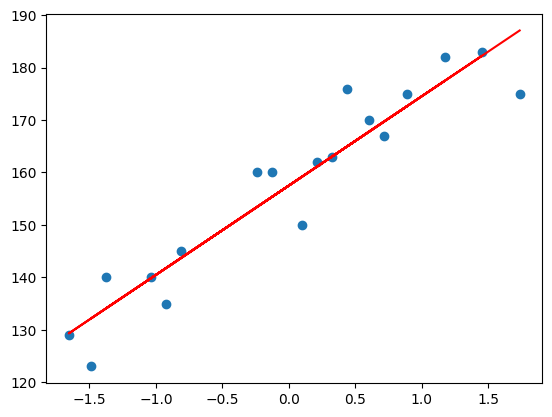

In [37]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),color='r')

In [38]:
y_pred_test=regression.predict(x_test)

In [40]:
y_pred_test,y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

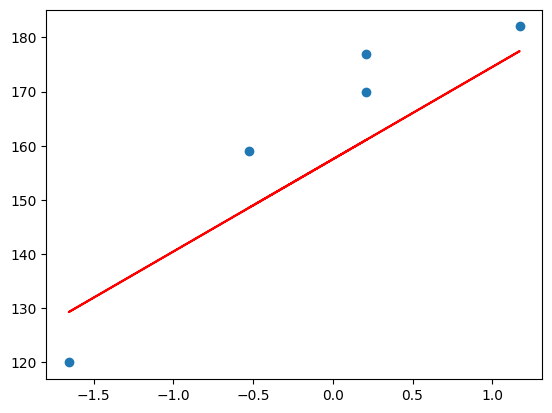

In [41]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regression.predict(x_test),color='r')

In [42]:
### performance matrix 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [43]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [ ]:
score=r2_score(y_test,y_pred_test)
print(score) ### accuracy

0.776986986042344


In [46]:
### new data point weight is 80
scaled_weight=scalar.transform([[80]])
scaled_weight

d:\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [48]:
print("The height that is predicted from the weigth of 80 is",regression.predict(scaled_weight))

The height that is predicted from the weigth of 80 is [[163.01076266]]


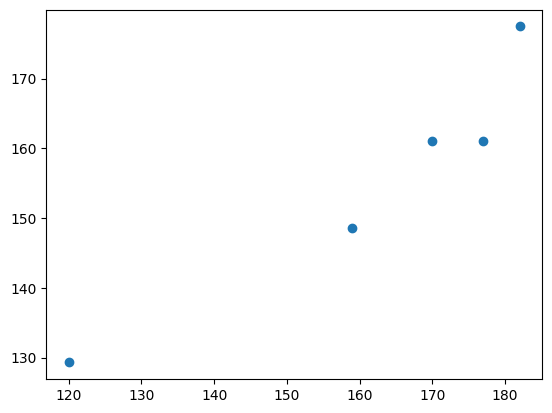

In [49]:
### assumption
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [50]:
## residuals
residuals=y_test-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


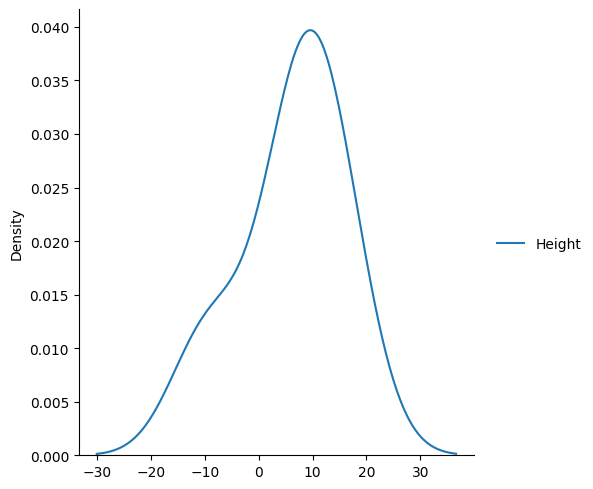

In [53]:
### plot the residuals
sns.displot(residuals,kind='kde')

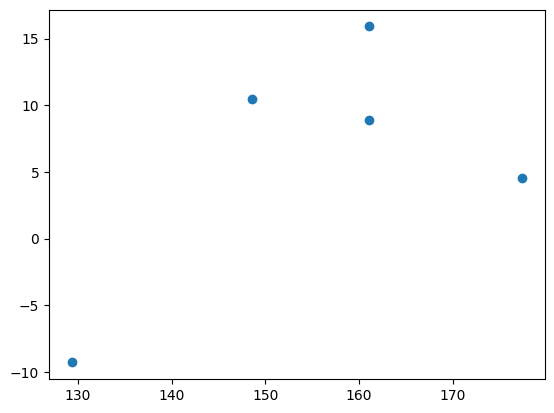

In [54]:
plt.scatter(y_pred_test,residuals)